In [33]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from pathlib import Path

np.random.seed(42)

plt.rc('font' , size=12)
plt.rc('axes' , labelsize=14 , titlesize=14)
plt.rc('legend' , fontsize=12)
plt.rc('xtick', labelsize=12)
plt.rc('ytick' , labelsize=12)



datapath = Path() / "data"

oecd_bli = pd.read_csv(datapath/"oecd_bli.csv")
gdp_per_capita =pd.read_csv(datapath/"gdp_per_capita.csv")


gdp_per_capita.columns

gdp_per_capita_2020 = gdp_per_capita[gdp_per_capita['Year'] ==2020]
gdp_per_capita_2020 = gdp_per_capita_2020.rename(
    columns= {"GDP per capita, PPP (constant 2017 international $)" : "GDP per capita"}
)
gdp_per_capita_2020

oecd_bli["Indicator"].value_counts()

oecd_bli = oecd_bli[oecd_bli['INEQUALITY']=="TOT"]
oecd_bli = oecd_bli.pivot(index="Country" , columns="Indicator" , values="Value")
oecd_bli

oecd_bli.reset_index(inplace=True)
oecd_bli


full_country_stats = oecd_bli.merge(gdp_per_capita_2020 , left_on="Country" , right_on="Entity" , how="inner")
full_country_stats

full_country_stats = full_country_stats[["Country", "Life satisfaction" , "GDP per capita"]]
full_country_stats

full_country_stats.to_csv(datapath / 'lifesat_full.csv' , index=False)

min_gdp = 23_500
max_gdp = 62_500

country_stats = full_country_stats[(full_country_stats["GDP per capita"] >= min_gdp) & (full_country_stats['GDP per capita'] <= max_gdp)]

country_stats.to_csv(datapath / 'lifesat.csv' , index=False)


theta_0 : 3.749049427376912
theta_1 : 6.778899694341219e-05


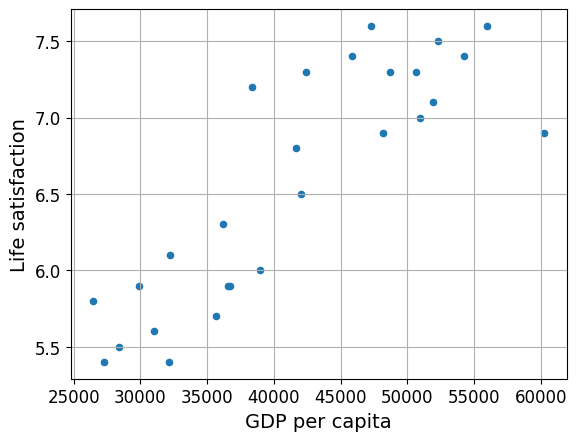

In [43]:
lifesat = pd.read_csv("data/lifesat.csv")

country_stats.plot(kind='scatter', grid=True , x="GDP per capita" , y= "Life satisfaction")


In [49]:
x = lifesat[["GDP per capita"]]
y = lifesat[['Life satisfaction']]

model = LinearRegression()

model.fit(x,y)

theta_0 = model.intercept_[0]
theta_1 = model.coef_[0][0]
print(f"theta_0 : {theta_0}")
print(f"theta_1 : {theta_1}")



theta_0 : 3.749049427376912
theta_1 : 6.778899694341219e-05


In [46]:
cyprus = (gdp_per_capita_2020[gdp_per_capita_2020['Entity']== 'Cyprus'][['GDP per capita']])

cyprus

,GDP per capita
1517,37655.180346
